In [1]:
#动漫板块--豆瓣分析
import numpy as np
import pandas as pd
#豆瓣记录片基本信息-显示数据+处理异常值
df = pd.read_csv('carton2010-2019.csv',encoding='utf8')
print(df.shape)
df.fillna('0').head(500)


(500, 9)


,index,drama_title,drama_directors,drama_casts,drama_rate,drama_url,drama_country,drama_language_list,drama_time
0,1,爱，死亡和机器人,"维克多·马尔多纳多,加布里埃尔·彭纳基奥利,阿尔弗雷多·托雷斯,弗兰克·巴尔森,阿尔贝托·米...","斯科特·怀特,诺兰·诺斯,马修·杨·金,迈克尔·本耶尔,乔什·布雷纳",9.1,https://movie.douban.com/subject/30424374/,美国,英语,2019
1,2,进击的巨人 第三季 Part.2,荒木哲郎,"梶裕贵,石川由依,井上麻里奈,神谷浩史,小野大辅",9.8,https://movie.douban.com/subject/30353357/,日本,日语,2019
2,3,一拳超人,夏目真悟,"古川慎,石川界人,梶裕贵,悠木碧,中村悠一",9.3,https://movie.douban.com/subject/26339248/,日本,日语,2015
3,4,瑞克和莫蒂 第一季,贾斯汀·罗兰,"贾斯汀·罗兰,汤姆·肯尼,克里斯·帕内尔,斯宾瑟·格拉默,萨拉·乔克",9.7,https://movie.douban.com/subject/11537954/,美国,英语,2013
4,5,瑞克和莫蒂 第三季,"贾斯汀·罗兰,Juan Jose Meza-Leon","贾斯汀·罗兰,克里斯·帕内尔,斯宾瑟·格拉默,萨拉·乔克,内森·菲利安",9.8,https://movie.douban.com/subject/26592971/,美国,英语,2017
5,6,一拳超人 第二季,樱井亲良,"古川慎,石川界人,梶裕贵,悠木碧,山路和弘",7.7,https://movie.douban.com/subject/26882339/,日本,日语,2019
6,7,斗破苍穹特别篇2,赵丙乐,"谢添天,冯骏骅,袁国庆,王宇航,刘北辰",8.6,https://movie.douban.com/subject/30222889/,中国大陆,汉语普通话,2019
7,8,灵能百分百,立川让,"伊藤节生,樱井孝宏,大塚明夫,入野自由,细谷佳正",9.3,https://movie.douban.com/subject/26677934/,日本,日语,2016
8,9,灵能百分百 II,立川让,"伊藤节生,樱井孝宏,大塚明夫,入野自由,松冈祯丞",9.6,https://movie.douban.com/subject/27011763/,日本,日语,2019
9,10,瑞克和莫蒂 第二季,"韦斯利·阿彻,皮特·米歇尔斯","贾斯汀·罗兰,克里斯·帕内尔,斯宾瑟·格拉默,萨拉·乔克,科甘-迈克尔·凯",9.8,https://movie.douban.com/subject/25865470/,美国,英语,2015


In [2]:
#重复性检查
kk=df['drama_title'].duplicated().head(20)
kk.duplicated().value_counts()
a=len(df.drama_title.unique())
b=len(df.drama_directors.unique())
print('动漫名字重复的有：%s'%(a),'动漫导演的重复值有：%s'%(b))

动漫名字重复的有：44 动漫导演的重复值有：33


In [3]:
#去除重复值
#k=df.drop_duplicates(['index'], keep='first',inplace=False).head(20)
drama_title= df['drama_title'].drop_duplicates()
print('drop_duplicates方法去重之后动漫总数为：',len(drama_title))
drama_title.head(10)

drop_duplicates方法去重之后动漫总数为： 44


0            爱，死亡和机器人
1    进击的巨人 第三季 Part.2
2                一拳超人
3           瑞克和莫蒂 第一季
4           瑞克和莫蒂 第三季
5            一拳超人 第二季
6            斗破苍穹特别篇2
7               灵能百分百
8            灵能百分百 II
9           瑞克和莫蒂 第二季
Name: drama_title, dtype: object

In [4]:
#缺失值的处理情况
print('动漫df表每个特征缺失的数目为：\n',df.isnull().sum())
print('动漫df表每个特征非缺失的数目为：\n',df.notnull().sum())
nan_col1 = df.isnull().any() # 获得含有NA的列
nan_col2 = df.isnull().all() # 获得全部为NA的列
print (nan_col1) # 打印输出
print (nan_col2) # 打印输出
# 丢弃缺失值
df2 = df.dropna() # 直接丢弃含有NA的行记录
print (df2.head()) # 打印输出

动漫df表每个特征缺失的数目为：
 index                    0
drama_title              0
drama_directors          0
drama_casts              4
drama_rate               0
 drama_url               0
drama_country          283
drama_language_list    283
drama_time               0
dtype: int64
动漫df表每个特征非缺失的数目为：
 index                  500
drama_title            500
drama_directors        500
drama_casts            496
drama_rate             500
 drama_url             500
drama_country          217
drama_language_list    217
drama_time             500
dtype: int64
index                  False
drama_title            False
drama_directors        False
drama_casts             True
drama_rate             False
 drama_url             False
drama_country           True
drama_language_list     True
drama_time             False
dtype: bool
index                  False
drama_title            False
drama_directors        False
drama_casts            False
drama_rate             False
 drama_url             False
dram

In [5]:
#去除缺少值
print('去除缺失的列前detail的形状为：', df.shape)
print('去除缺失的列后detail的形状为：',df2.dropna(axis = 1,how ='any',thresh=None, subset=None, inplace=False).shape)

去除缺失的列前detail的形状为： (500, 9)
去除缺失的列后detail的形状为： (217, 9)


In [6]:
#描述性统计-----动漫豆瓣评分
#计算数据的豆瓣平均分
mean1=np.mean(df['drama_rate'])
max1=np.max(df['drama_rate'])
print('动漫的豆瓣评分的描述性统计为：\n', df['drama_rate'].describe())
#计算动漫导演出现次数出现最多的前20名,以及出现的次数
print('动漫导演出现次数出现最多的前20名：\n',
      df['drama_directors'].value_counts()[0:20])
#转化类型为category
df['drama_title'] = df['drama_title'].astype('category')
print('动漫更改类型：',df['drama_title'].dtypes)
# category类型特征的描述性统计
print('动漫描述统计结果为：\n',
      df['drama_title'].describe())
#转化类型为category
df['drama_directors'] = df['drama_directors'].astype('category')
print('动漫更改类型：',df['drama_directors'].dtypes)
# category类型特征的描述性统计
print('动漫导演次数描述统计结果为：\n',
      df['drama_directors'].describe())

动漫的豆瓣评分的描述性统计为：
 count    500.000000
mean       8.974200
std        0.502533
min        6.700000
25%        8.700000
50%        9.000000
75%        9.300000
max        9.800000
Name: drama_rate, dtype: float64
动漫导演出现次数出现最多的前20名：
 王昕           45
长崎健司         44
樱井弘明         34
熊可           29
小林雅仁         20
渡边信一郎,堀元宣    20
田村耕太郎        20
林春柳          20
高松信司         20
石黑恭平         19
李豪凌,王昕       18
何伟锋          18
野村和也         17
立川让          17
神户守          15
铃木健一         15
山崎光惠         14
长井龙雪         14
大地丙太郎        11
畠山守          11
Name: drama_directors, dtype: int64
动漫更改类型： category
动漫描述统计结果为：
 count         500
unique         44
top       齐木楠雄的灾难
freq           20
Name: drama_title, dtype: object
动漫更改类型： category
动漫导演次数描述统计结果为：
 count     500
unique     33
top        王昕
freq       45
Name: drama_directors, dtype: object


In [7]:
#  探究在所获取的数据中国家分布情况_counts()返回一个Series 序列--可视化条形图
country = df['drama_country'].value_counts()
#series 转dataframe 可以使用字典的方式
mycountry = pd.DataFrame({'country':country.index,'counts':country.values})
mycountry.head(20)
#可视化展现数据 动漫制片国家的情况-条形图/饼图


,country,counts
0,日本,154
1,中国大陆,32
2,美国,20
3,中国大陆 / 日本,11


0    154
1     32
2     20
3     11
Name: counts, dtype: int64


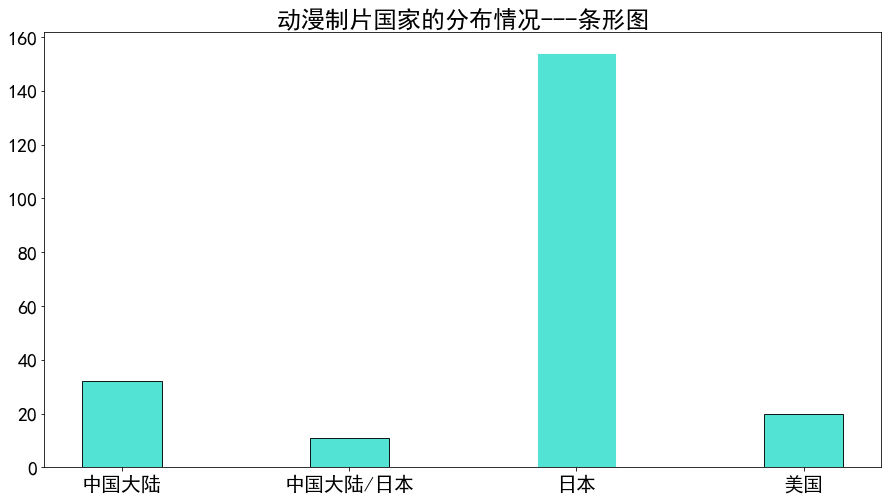

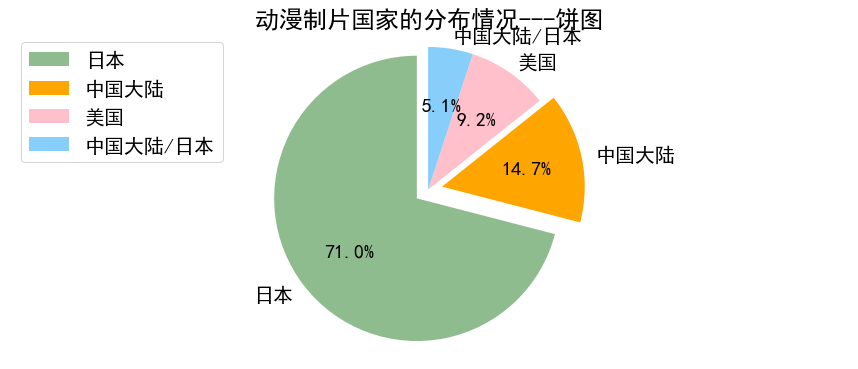

In [8]:
#可视化展现数据 动漫制片国家的情况-条形图/饼图
mycountry.country
print(mycountry.counts)
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20
plt.figure(figsize=(15,8))
x=['日本','中国大陆','美国','中国大陆/日本']
y=mycountry.counts[:]
plt.bar(x, y, alpha=0.9, width = 0.35, facecolor = 'turquoise', edgecolor = 'white', label='one', lw=1)
plt.title('动漫制片国家的分布情况---条形图')
plt.show()
#####饼图
plt.figure(figsize=(15, 6))
#explode=[0.01,0.01,0.01,0,0,0]
explode = (0.1,0.1,0,0)
values=y
colors = ['darkseagreen','orange','pink','lightskyblue','lightgreen','r']
plt.pie(values,explode=explode, labels=x, colors=colors,autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('动漫制片国家的分布情况---饼图')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

   counts  time
0      69  2019
1      49  2016
2      37  2018
3      23  2017
4      13  2015
5      11  2014
6      11  2011
7       4  2013


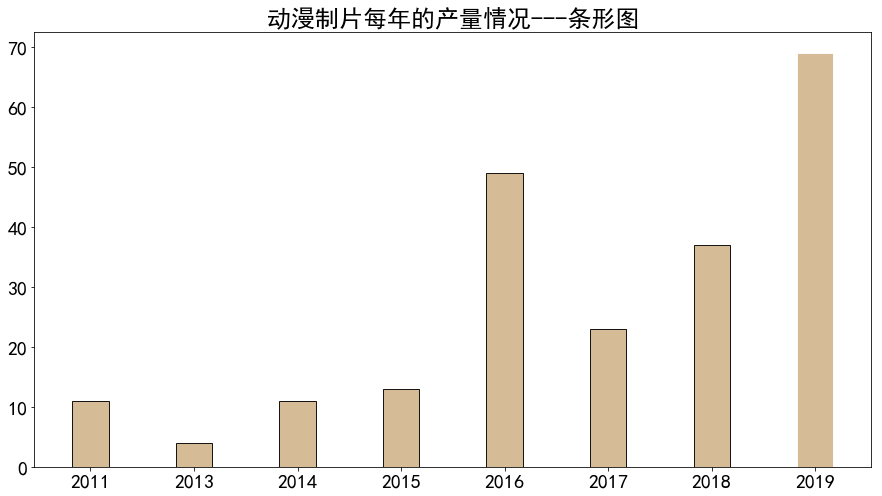

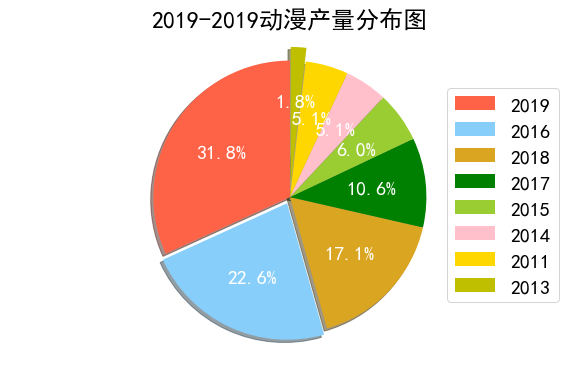

In [9]:
#分析同一年中动漫的产生情况*****
t = df2['drama_time'].value_counts(False)
t1 = pd.DataFrame({'time':t.index,'counts':t.values})
print(t1.head(10))
#print(df2['drama_time'].value_counts().head(100))
#####可视化分析
plt.figure(figsize=(15,8))
x=t1.time[:]
y=t1.counts[:]
plt.bar(x, y, alpha=0.9, width = 0.35, facecolor = 'tan', edgecolor = 'white', label='one', lw=1)
plt.title('动漫制片每年的产量情况---条形图')
plt.show()
#结论：可知2019年产生的数量最多，最少的是在2013年只有12部
df_rank=pd.DataFrame({'time':df['drama_time'],'sore':df['drama_rate']})
df_rank.sort_values(['time','sore'],ascending=[1,0],inplace=False)
df_rank.head(20)
#分析同一年中纪录片的产量情况饼图*****************
plt.figure(figsize=(10, 6))
explode = (0, 0.05, 0, 0,0,0,0,0.1)
colors = ['tomato', 'lightskyblue', 'goldenrod', 'green','yellowgreen','pink','gold', 'y']

plt.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True,  labeldistance = 1.1,colors=colors,pctdistance=0.6,textprops={'fontsize': 20, 'color': 'w'},startangle=90)
plt.title('2019-2019动漫产量分布图')
plt.axis('equal')
plt.legend(loc='right')
plt.show()

In [10]:
#####分析动漫的豆瓣评分情况,豆瓣评分的前10部动漫
k4=df.drop_duplicates(['drama_title'], keep='first').head(20)
document_name=k4[['drama_title','drama_rate']][:400 ]
k2=document_name.sort_values('drama_rate',inplace=False,ascending=False)[:]

#重新进行排序index
kkk2=k2.reset_index(drop=True)
print(kkk2.head(10))
#print(k_1)
print('豆瓣评分的最高分是：',df2['drama_rate'].max())
print('豆瓣评分的最低分是：',df2['drama_rate'].min())
print('豆瓣评分的平均值是：',df2['drama_rate'].mean())
print('豆瓣评分的方差是：',df2['drama_rate'].var())
print('豆瓣评分最低的动漫是：',df2['drama_title'][df2['drama_rate'].idxmin()])#找到最小值的位置
print('豆瓣评分最高的动漫是：',df2['drama_title'][df2['drama_rate'].idxmax()])#找到最小值的位置
#结论：由得出得条形图可以知道张艺谋得《影》的评分在取前几列数据是最低的豆瓣评

        drama_title  drama_rate
0         瑞克和莫蒂 第三季         9.8
1         瑞克和莫蒂 第二季         9.8
2  进击的巨人 第三季 Part.2         9.8
3         瑞克和莫蒂 第一季         9.7
4              强风吹拂         9.6
5          灵能百分百 II         9.6
6           卡罗尔与星期二         9.4
7        我的英雄学院 第3季         9.3
8              一拳超人         9.3
9             灵能百分百         9.3
豆瓣评分的最高分是： 9.8
豆瓣评分的最低分是： 7.7
豆瓣评分的平均值是： 9.093548387096787
豆瓣评分的方差是： 0.2146804062126644
豆瓣评分最低的动漫是： 一拳超人 第二季
豆瓣评分最高的动漫是： 进击的巨人 第三季 Part.2


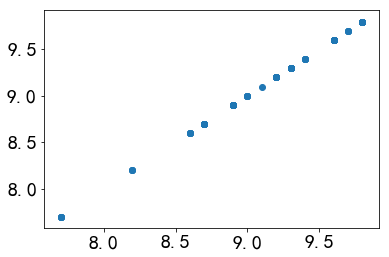

            index
count   14.000000
mean    95.323165
std     45.797604
min      1.000000
25%     65.544118
50%    105.674419
75%    126.540323
max    167.500000
     sore                                
      max  min    sum      mean       std
time                                     
2011  8.7  8.7   95.7  8.700000  0.000000
2013  9.7  9.7   38.8  9.700000  0.000000
2014  8.9  8.4   94.9  8.627273  0.261116
2015  9.8  9.3  125.9  9.684615  0.219265
2016  9.3  8.2  434.8  8.873469  0.400404
2017  9.8  9.2  214.6  9.330435  0.253045
2018  9.6  8.9  341.4  9.227027  0.297815
2019  9.8  7.7  627.2  9.089855  0.519939
Index(['2011', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object', name='time')


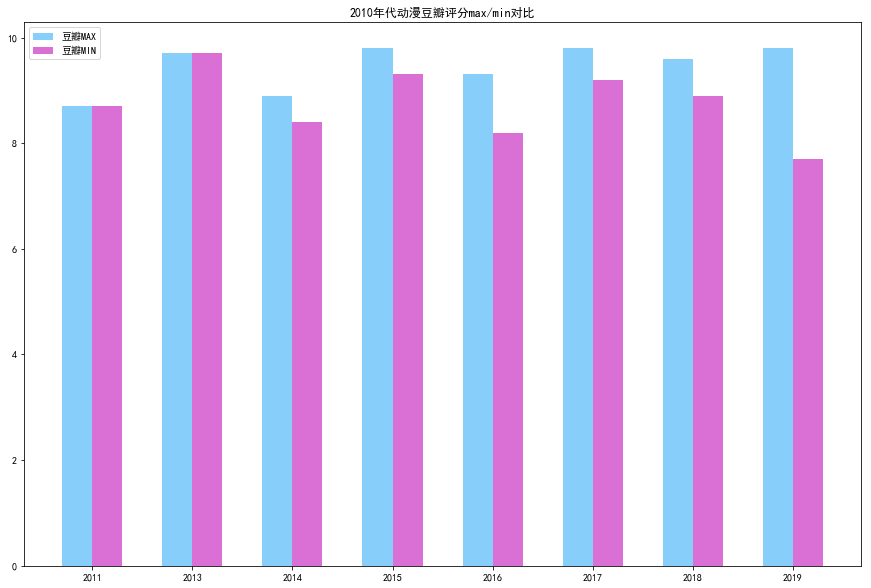

In [11]:
####豆瓣评分的散点分布情况----可视化
import numpy as np
import matplotlib.pyplot as plt
#散点图
x = df2['drama_rate'].values[:100]
y = df2['drama_rate'].values[:100]
plt.scatter(x, y)
plt.show()
#####分析豆瓣评分每年的平均方等情况
#df3 = df2.groupby(['drama_rate','drama_time'], as_index=False)['Amount'].sum()
print(df2.groupby('drama_rate').mean().describe())
df_rank=pd.DataFrame({'time':df2['drama_time'],'sore':df2['drama_rate']})
df_rank.sort_values(['time','sore'],ascending=[1,0],inplace=False)
#print(df_rank.describe())
df_rank=df_rank[['time','sore']]
#print(df_rank)
group_by_name=df_rank.groupby('time') 
######豆瓣评分情况--豆瓣评分
da1=group_by_name[['time','sore']].agg(['max','min','sum','mean','std'])
print(da1)
print(da1.index)
#########-每年的最高分与最低分的柱状图显示
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']#设置字体以便支持中文
import numpy as np
x=np.arange(8)#柱状图在横坐标上的位置
#列出你要显示的数据，数据的列表长度与x长度相同
y1=[8.7,9.7,8.9,9.8,9.3,9.8,9.6,9.8]
y2=[8.7,9.7,8.4,9.3,8.2,9.2,8.9,7.7]
plt.figure(figsize=(15,10))
tick_label=['2011', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
bar_width=0.3#设置柱状图的宽度
#绘制并列柱状图
plt.bar(x,y1,bar_width,color='lightskyblue',label='豆瓣MAX')
plt.bar(x+bar_width,y2,bar_width,color='orchid',label='豆瓣MIN')
plt.legend()#显示图例，即label
plt.xticks(x+bar_width/2,tick_label)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.title('2010年代动漫豆瓣评分max/min对比')
plt.show()

In [27]:
######-
#####分析豆瓣评分分析导演的动漫具体豆瓣评分情况-
df_dir=pd.DataFrame({'sore':df2['drama_rate'],'director':df2['drama_directors']})
df_dir.sort_values(['sore','director'],ascending=[1,0],inplace=False)
#print(df_rank.describe())
df_dir=df_dir[['sore','director']]
#print(df_dir)
####重要！！
group_by_name=df_dir.groupby('director') 
#for name,group in group_by_name:
#    print(name)
#    print(group)
######豆瓣评分情况--豆瓣评分
da1=group_by_name[['sore','director']].agg(['max','min','sum','mean'])
print(da1)

                                                   sore                      
                                                    max  min    sum      mean
director                                                                     
何伟锋                                                 8.9  8.9   35.6  8.900000
夏目真悟                                                9.3  9.3   27.9  9.300000
小林雅仁                                                9.2  9.2   73.6  9.200000
李豪凌,王昕                                              8.7  8.7   95.7  8.700000
林春柳                                                 9.0  9.0    9.0  9.000000
樱井亲良                                                7.7  7.7   46.2  7.700000
樱井弘明                                                9.3  9.3   93.0  9.300000
渡边信一郎,堀元宣                                           9.4  9.4  103.4  9.400000
熊可                                                  8.9  8.9   97.9  8.900000
王昕                                                  9.2  9.2   8

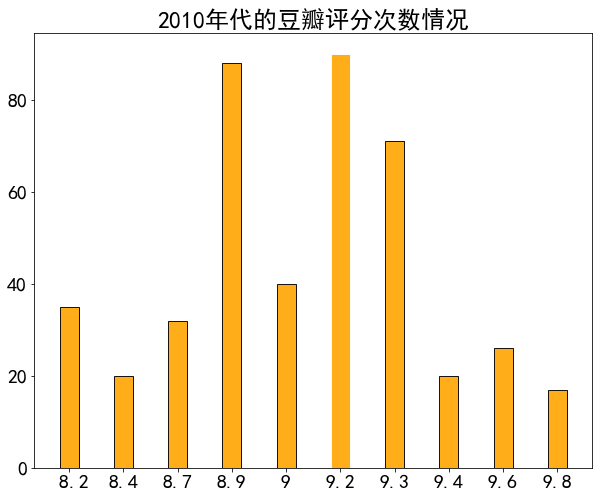

In [77]:
###分析2010年代种整体的豆瓣评分的情况-相同的评分出现几次
rate = df['drama_rate'].value_counts()
#series 转dataframe 可以使用字典的方式
%matplotlib inline
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20
import numpy as np
from matplotlib import pyplot as plt
mycountry = pd.DataFrame({'rate':rate.index,'counts':rate.values})
mycountry.head(20)
#print(mycountry.rate)
plt.figure(figsize=(10,8))
#x=mycountry.rate.values# 获取评分
x=[ '9.2','8.9','9.3','9',' 8.2', '8.7','9.6' ,'9.4','8.4','9.8']
y=[90,88,71,40,35,32,26,20,20,17]
plt.bar(x, y, alpha=0.9, width = 0.35, facecolor = 'orange', edgecolor = 'white', label='one', lw=1)
plt.title('2010年代的豆瓣评分次数情况')
plt.show()